In [1]:
!pip install numpy tensorflow keras pillow

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


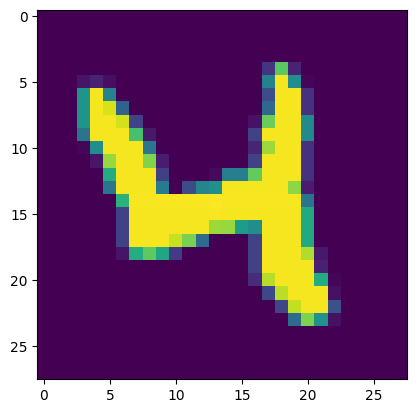

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20])

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
num_classes = 10  # There are 10 classes (digits 0-9)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

C:\Users\Sciddhanto\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - accuracy: 0.1374 - loss: 2.2876 - val_accuracy: 0.4252 - val_loss: 2.2177
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.2943 - loss: 2.2088 - val_accuracy: 0.5952 - val_loss: 2.1174
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.4224 - loss: 2.1103 - val_accuracy: 0.6817 - val_loss: 1.9788
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.5307 - loss: 1.9708 - val_accuracy: 0.7306 - val_loss: 1.7853
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.5916 - loss: 1.7880 - val_accuracy: 0.7641 - val_loss: 1.5417
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.6473 - loss: 1.5597 - val_accuracy: 0.7848 - val_loss: 1.2850
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.6733 - loss: 1.3402 - val_accuracy: 0.8033 - val_loss: 1.0615
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.6961 - loss: 1.1652 - 

The model has successfully trained
Saving the model as mnist.h5


In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6862802505493164
Test accuracy: 0.8392999768257141


In [8]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()